In [22]:
#for dataset
import pandas as pd
import numpy as np
#for plotting
import matplotlib.pyplot as plt
#for featuring 
import cufflinks as cf
cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [18]:
application_train=pd.read_csv("D:\\Data Science\FDS-Bressan\Project\\application_train.csv")
application_test=pd.read_csv("D:\\Data Science\FDS-Bressan\Project\\application_test.csv")


### Distribution of AMT_CREDIT

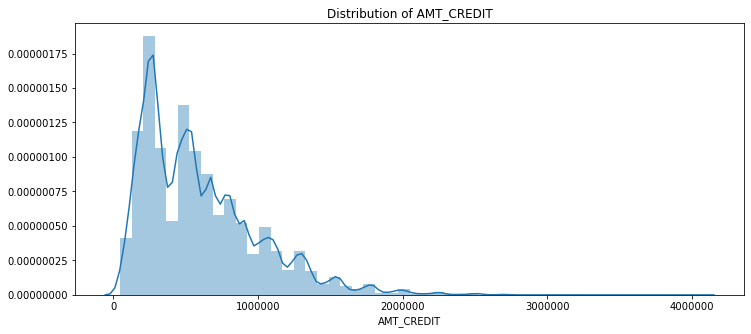

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_train["AMT_CREDIT"])

### Distribution of AMT_INCOME_TOTAL

#### Distribution of income based on application train

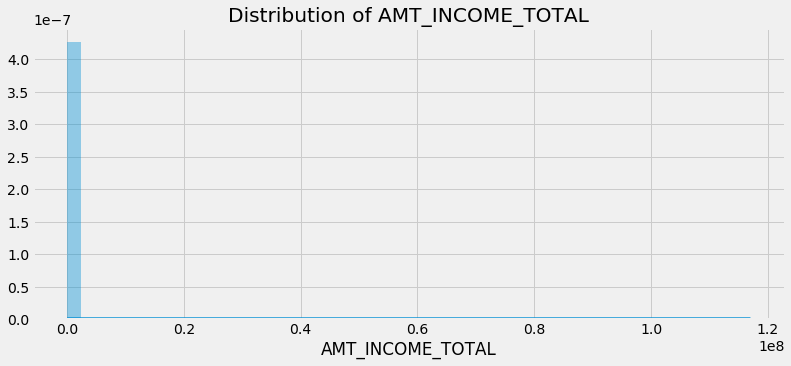

In [17]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(application_train["AMT_INCOME_TOTAL"].dropna())

### Dependence between the data using correlation
$\bullet$ $.00-.19 $ “very weak”\
$\bullet$ $.20-.39 $ “weak”\
$\bullet$ $.40-.59 $ “moderate”\
$\bullet$ $.60-.79 $ “strong”\
$\bullet$ $.80-1.0 $ “very strong”



In [19]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not')

In [20]:
# Find the correlation of the positive days since birth and target
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.07823930830982712

### Distribution of age with respect to the target value

Text(0, 0.5, 'Count')

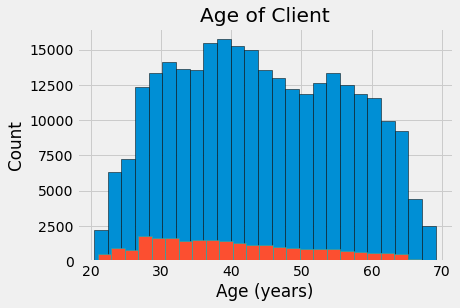

In [23]:
#plt.figure(figsize=(10,8))
#sns.kdeplot(-application_train.loc[application_train['TARGET']==0,'DAYS_BIRTH']/365,label='target==0')
#sns.kdeplot(-application_train.loc[application_train['TARGET']==1,'DAYS_BIRTH']/365,label='target==1')
#plt.xlabel('age(years)')
#plt.ylabel('density')
#plt.title('age distribution')
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(application_train.loc[application_train['TARGET']==0,'DAYS_BIRTH']/(365), edgecolor = 'k', bins = 25)
plt.hist(application_train.loc[application_train['TARGET']==1,'DAYS_BIRTH']/(365), edgecolor = "c", bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)')
plt.ylabel('Count')

In [24]:
age_data=application_train[['DAYS_BIRTH','TARGET']]
age_data['YEAR_BIRTH']=age_data['DAYS_BIRTH']/365
age_data['YEAR_BIND']=pd.cut(age_data['YEAR_BIRTH'],bins=np.linspace(20,70,num=11))
age_data.head()

,DAYS_BIRTH,TARGET,YEAR_BIRTH,YEAR_BIND
0,9461,1,25.920548,"(25.0, 30.0]"
1,16765,0,45.931507,"(45.0, 50.0]"
2,19046,0,52.180822,"(50.0, 55.0]"
3,19005,0,52.068493,"(50.0, 55.0]"
4,19932,0,54.608219,"(50.0, 55.0]"


In [25]:
age_group=age_data.groupby('YEAR_BIND').mean()
age_group

,DAYS_BIRTH,TARGET,YEAR_BIRTH
YEAR_BIND,,,
"(20.0, 25.0]",8532.795625,0.123036,23.377522
"(25.0, 30.0]",10155.219250,0.111436,27.822518
"(30.0, 35.0]",11854.848377,0.102814,32.479037
"(35.0, 40.0]",13707.908253,0.089414,37.555913
"(40.0, 45.0]",15497.661233,0.078491,42.459346
"(45.0, 50.0]",17323.900441,0.074171,47.462741
"(50.0, 55.0]",19196.494791,0.066968,52.593136
"(55.0, 60.0]",20984.262742,0.055314,57.491131
"(60.0, 65.0]",22780.547460,0.052737,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

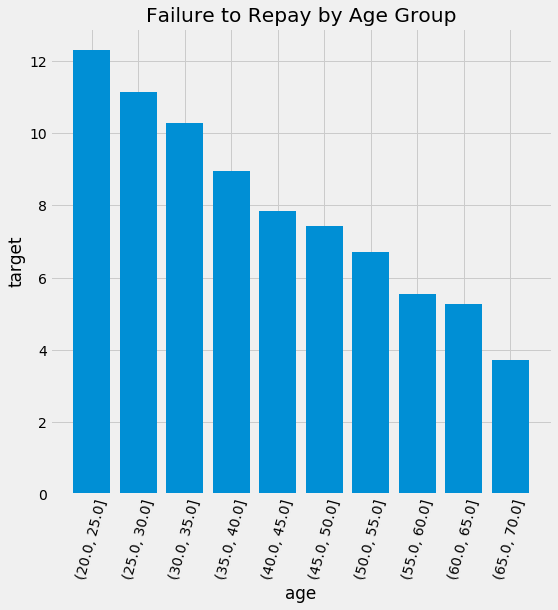

In [26]:
plt.figure(figsize=(8,8))
plt.bar(age_group.index.astype(str),100*age_group.TARGET)
plt.xticks(rotation=75)
plt.xlabel('age')
plt.ylabel('target')
plt.title('Failure to Repay by Age Group')

In [27]:
occupation = application_train["OCCUPATION_TYPE"].value_counts()

### Occupation of Applicant's who applied for loan

In [28]:
occupation.iplot(kind='bar', xTitle = 'Occupation', yTitle = "Count", title = 'Occupation of Applicant\'s who applied for loan', color = 'green')

### Income sources of Application's who applied for loan

In [29]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Income sources of Applicant\'s', hole = 0.5)

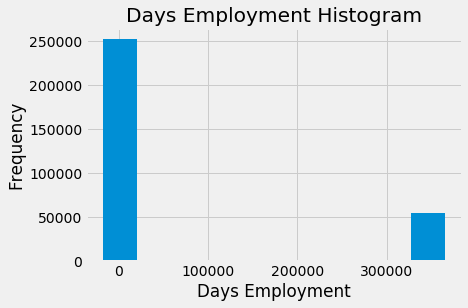

In [35]:
application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [37]:
anom = application_train[application_train['DAYS_EMPLOYED'] == 365243]
non_anom = application_train[application_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days Employment')

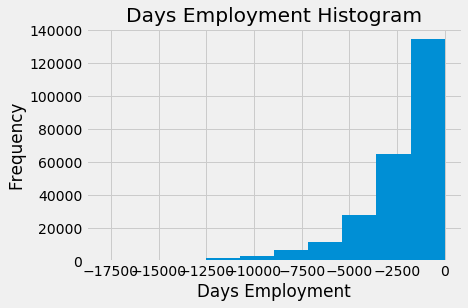

In [38]:
# Create an anomalous flag column
application_train['DAYS_EMPLOYED_ANOM'] = application_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [39]:
application_test['DAYS_EMPLOYED_ANOM'] = application_test["DAYS_EMPLOYED"] == 365243
application_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (application_test["DAYS_EMPLOYED_ANOM"].sum(), len(application_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Borrower in terms of gender

Surprisingly, females are the highest borrowers with counts:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


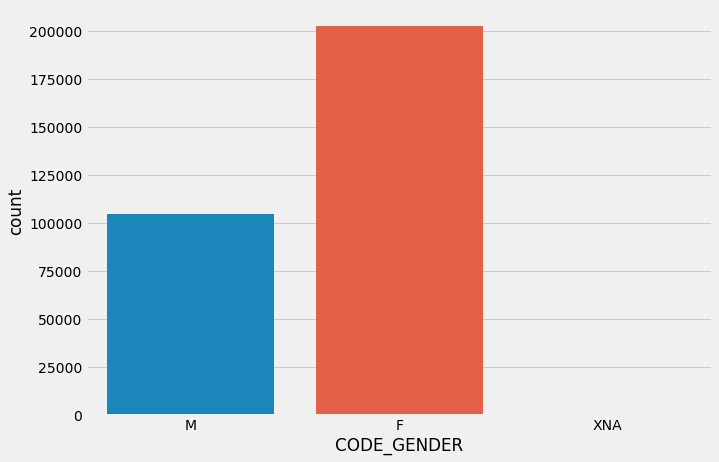

In [42]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=application_train)
print("Surprisingly, females are the highest borrowers with counts:\n{}".format(application_train.CODE_GENDER.value_counts()))